## 6.6: Analyzing Time Series Data

### Contents
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Autocorrelations

### Importing necessary Libraries & Dataset

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [58]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [59]:
# Creating path to import dataset

path = r'C:\Users\aleen\OneDrive\Desktop\Aleena\CF assignments\Data Immersion\Achievement 6\Climate Change\ClimateChange'

In [60]:
# Importing dataset climate_clean as df_climate

df =  pd.read_csv(os.path.join(path, 'climate_change.csv'), index_col = False)

#### Check Dataset

In [61]:
df.shape

(284852, 5)

In [62]:
df.head()

,Unnamed: 0,country_name,months,year,temp_change
0,0,Afghanistan,January,1961,0.777
1,1,Afghanistan,February,1961,-1.743
2,2,Afghanistan,March,1961,0.516
3,3,Afghanistan,April,1961,-1.709
4,4,Afghanistan,May,1961,1.412


In [63]:
df.columns

Index(['Unnamed: 0', 'country_name', 'months', 'year', 'temp_change'], dtype='object')

In [64]:
type(df)

pandas.core.frame.DataFrame

In [65]:
df = df.groupby(['year',]).agg({'temp_change':'mean'})

In [66]:
df.head(30)

,temp_change
year,
1961,0.144488
1962,-0.028981
1963,-0.026252
1964,-0.122131
1965,-0.224178
1966,0.095070
1967,-0.131975
1968,-0.167675
1969,0.105796


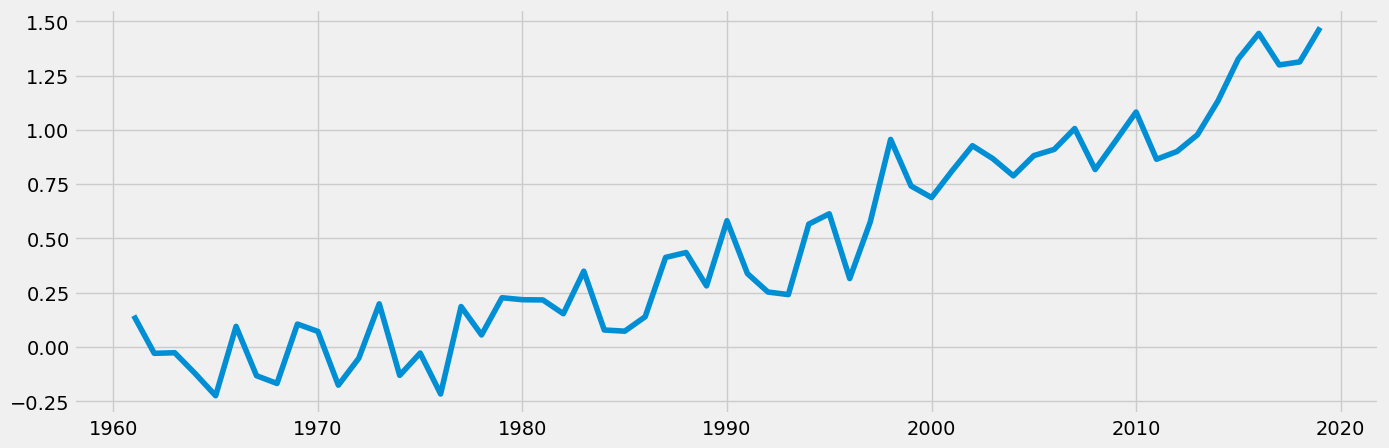

In [75]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

###  Subsetting, wrangling, and cleaning time-series data

In [76]:
df_1 = df.reset_index()

In [77]:
df_1.head()

,year,temp_change
0,1961,0.144488
1,1962,-0.028981
2,1963,-0.026252
3,1964,-0.122131
4,1965,-0.224178


In [85]:
df_sub = df_1.loc[(df_1['year'] >= 2010) & (df_1['year'] < 2020)]

In [86]:
df_sub.shape

(10, 2)

In [87]:
df_sub.head(10)

,year,temp_change
49,2010,1.081963
50,2011,0.864479
51,2012,0.900384
52,2013,0.977267
53,2014,1.132473
54,2015,1.326988
55,2016,1.443926
56,2017,1.298810
57,2018,1.312751
58,2019,1.470953


In [37]:
datetime_series = pd.Series(
    pd.date_range("2000-01-01", periods=3, freq="Y"))

In [38]:
datetime_series.dt.year

0    2000
1    2001
2    2002
dtype: int64

In [89]:
# Set the "Date" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['year'], format='%Y') # Create a datetime column from "Date.""

In [90]:
df_sub.head(10)

,year,temp_change,datetime
49,2010,1.081963,2010-01-01
50,2011,0.864479,2011-01-01
51,2012,0.900384,2012-01-01
52,2013,0.977267,2013-01-01
53,2014,1.132473,2014-01-01
54,2015,1.326988,2015-01-01
55,2016,1.443926,2016-01-01
56,2017,1.298810,2017-01-01
57,2018,1.312751,2018-01-01
58,2019,1.470953,2019-01-01


In [91]:
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.

In [92]:
df_sub.head(10)

,year,temp_change
datetime,,
2010-01-01,2010,1.081963
2011-01-01,2011,0.864479
2012-01-01,2012,0.900384
2013-01-01,2013,0.977267
2014-01-01,2014,1.132473
2015-01-01,2015,1.326988
2016-01-01,2016,1.443926
2017-01-01,2017,1.298810
2018-01-01,2018,1.312751


In [93]:
df_sub.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.

In [94]:
df_sub.head()

,temp_change
datetime,
2010-01-01,1.081963
2011-01-01,0.864479
2012-01-01,0.900384
2013-01-01,0.977267
2014-01-01,1.132473


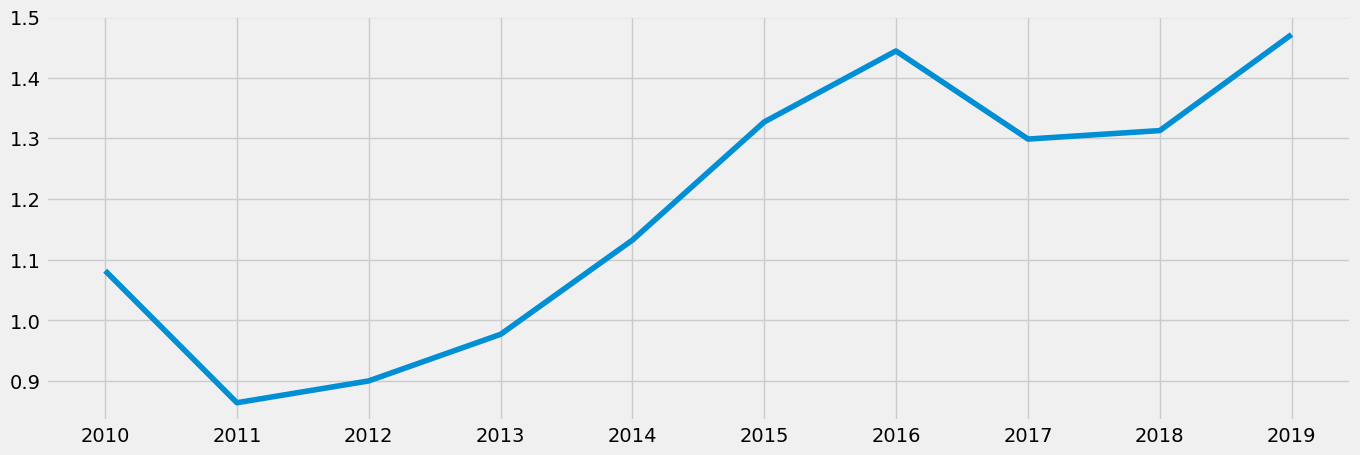

In [95]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [96]:
# Check for missing values (you shouldn't have any)

df_sub.isnull().sum() 

temp_change    0
dtype: int64

In [97]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()

0

###  Time series analysis: decomposition

In [99]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [100]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

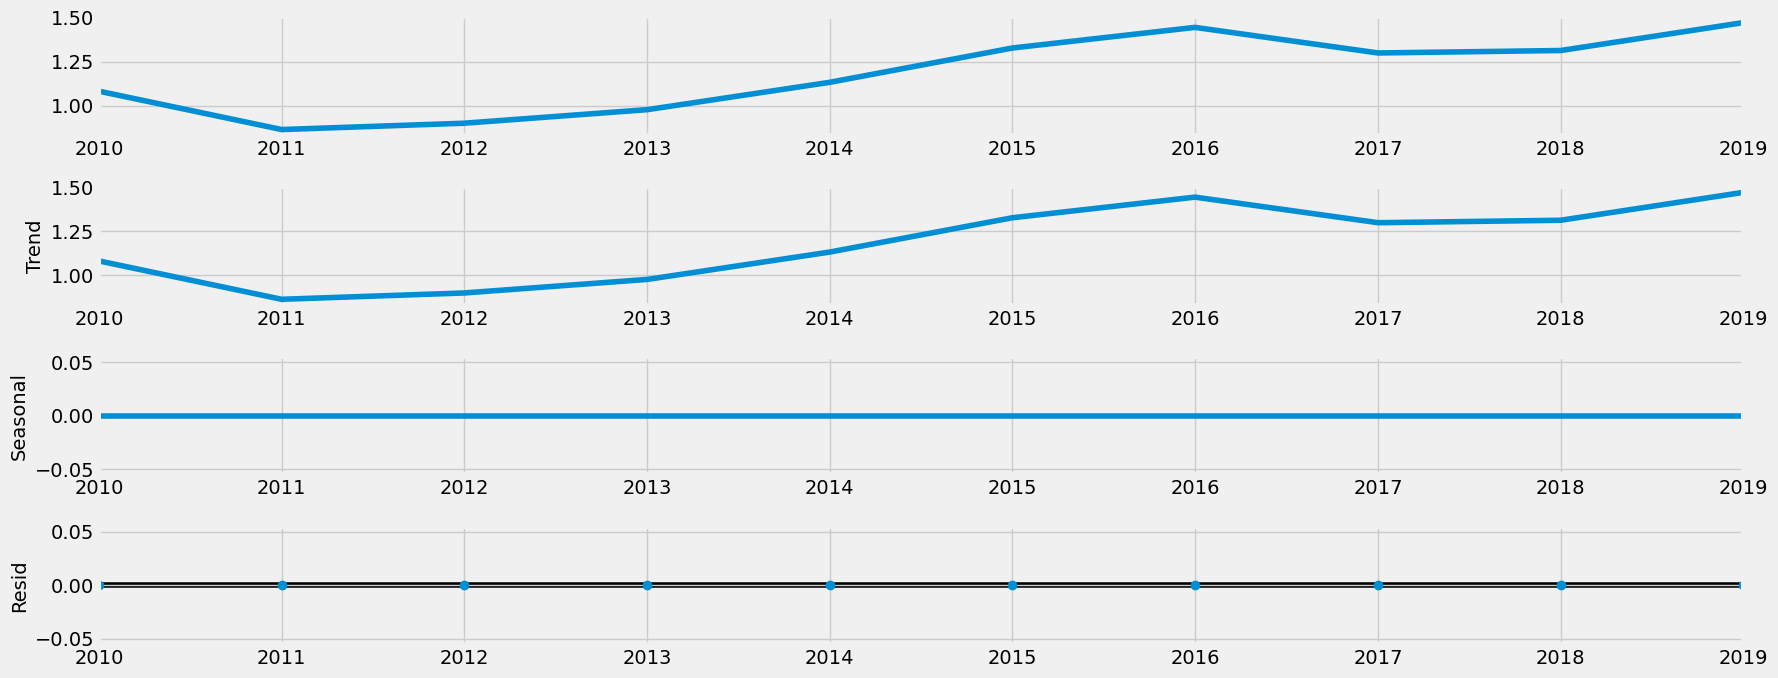

In [101]:
# Plot the separate components

decomposition.plot()
plt.show()

In [102]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['temp_change'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.408365
p-value                        0.578260
Number of Lags Used            3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


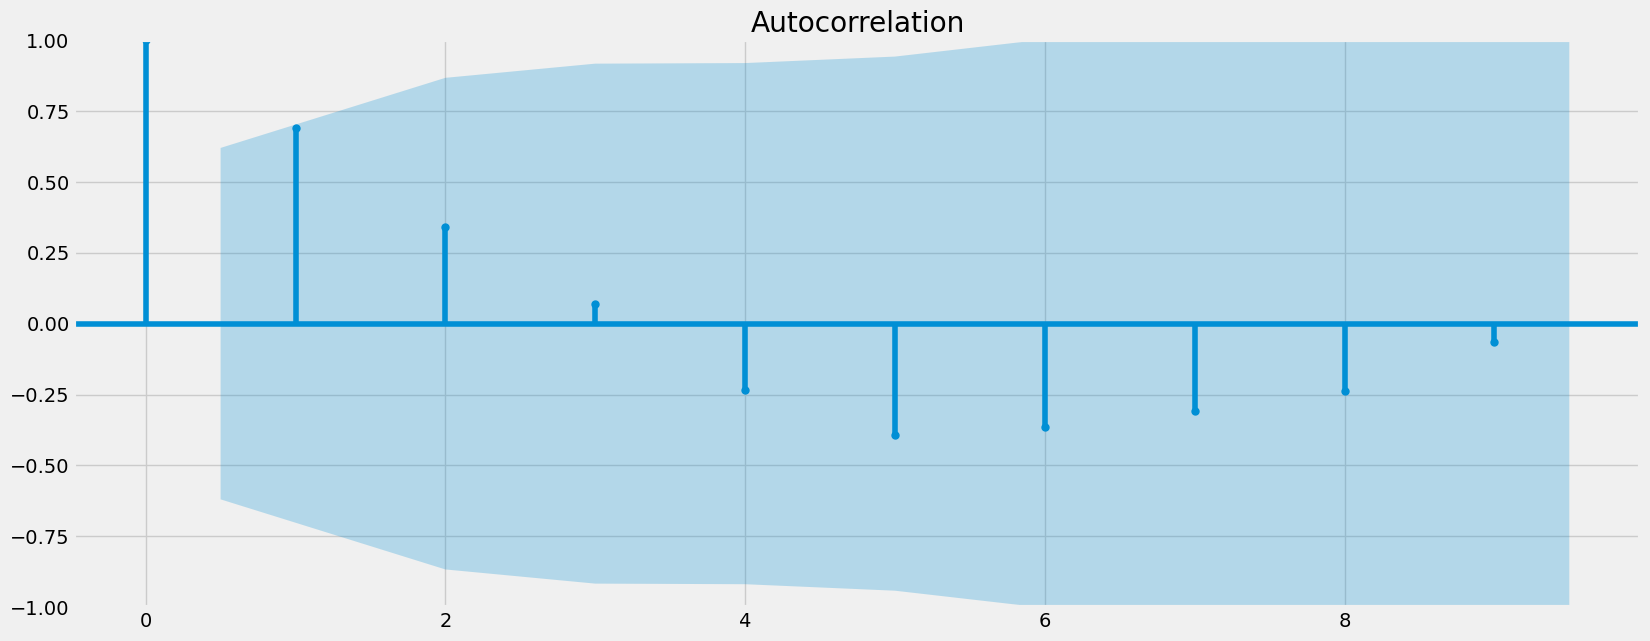

In [103]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()

### Testing for stationarity

In [104]:
df_diff = df_sub - df_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [105]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [106]:
df_diff.head()

,temp_change
datetime,
2011-01-01,-0.217484
2012-01-01,0.035905
2013-01-01,0.076882
2014-01-01,0.155207
2015-01-01,0.194514


In [107]:
df_diff.columns

Index(['temp_change'], dtype='object')

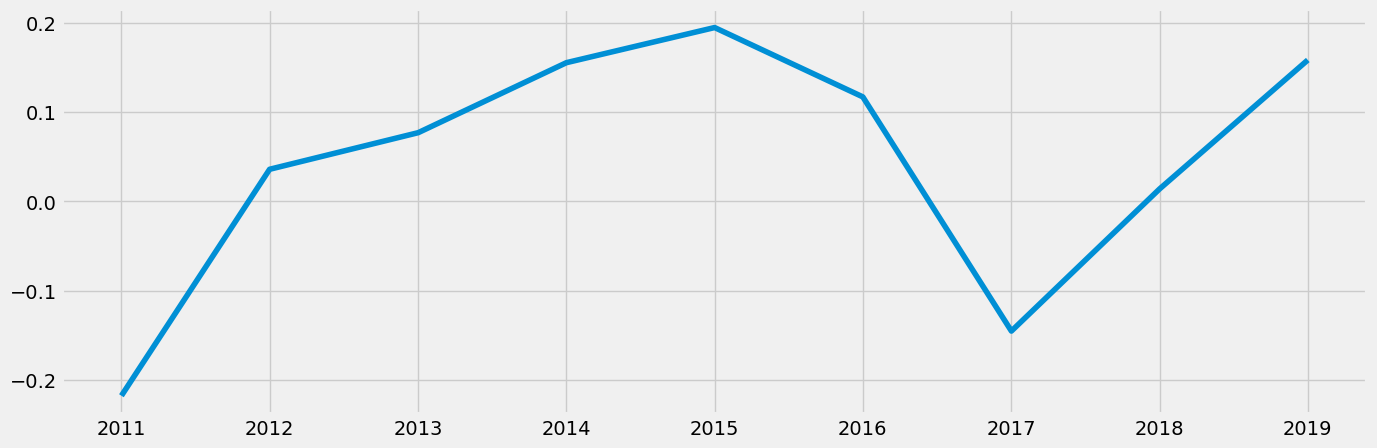

In [108]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

### Autocorrelation

In [109]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.126577
p-value                        0.233963
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


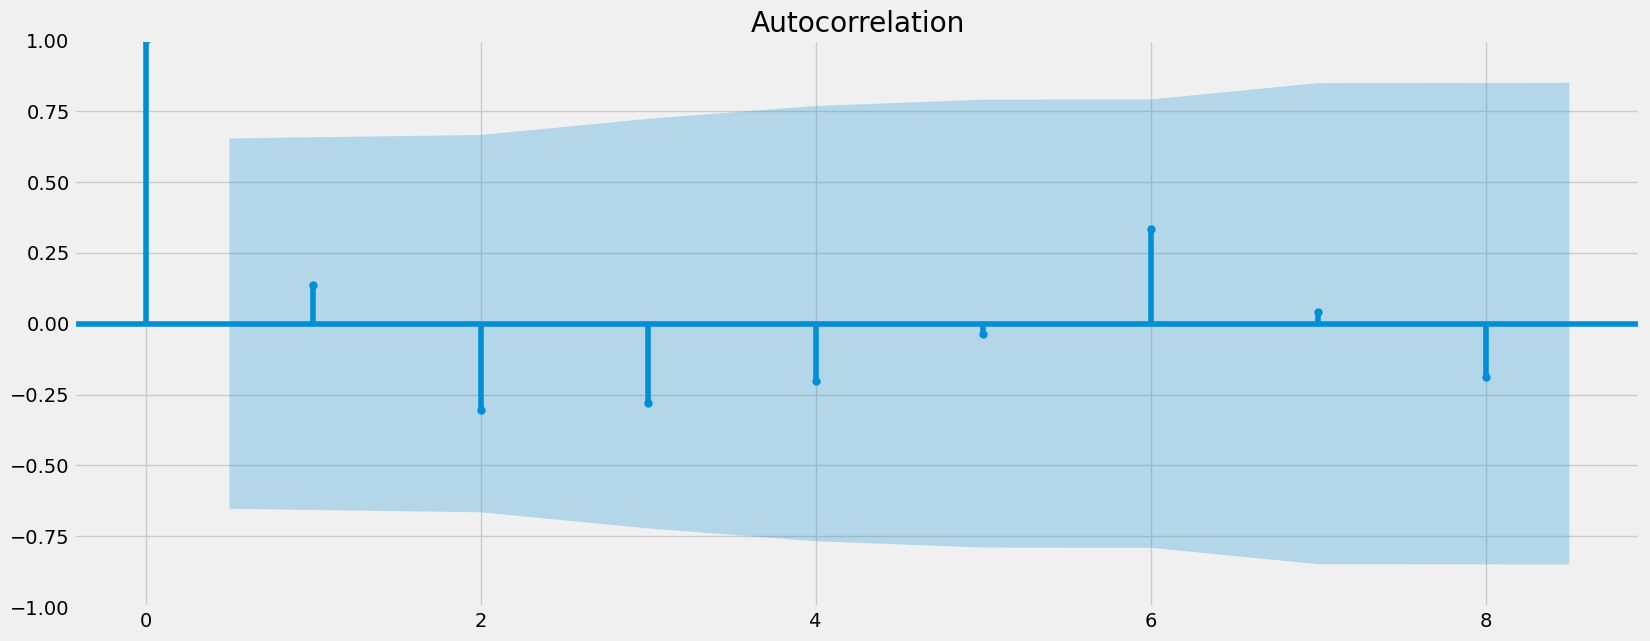

In [110]:
plot_acf(df_diff)
plt.show()